# School of Mathematics and Statistics, University of Sydney
# MATH3X76/4076 Mathematical Computing
## Lab 3 - NumPy (Solutions)

These labs are developed partially based on content from S. Roberts, G. Chandler, J. Thomson, L. Stals, K. Duru and G. Vasil.

This lab will introduce you to linear algebra in Python, using the numpy package. NumPy (short for 'numeric Python') is the standard package for manipulating vectors and matrices in Python. It comes included as part of the Anaconda distribution.

To check that you have NumPy, load the package (using the standard abbreviation `np`) and check the package version:

In [1]:
import numpy as np
print(np.__version__)

1.18.1


For more information about anything in NumPy, the online documentation is very helpful: https://numpy.org/doc/stable/.

The available NumPy functions and specific syntax don’t change much, but are occasionally updated. If there is a mismatch between what the documentation says and what NumPy is allowing you to do, you may want to check the documentation for the specific version of NumPy you have installed (as you checked above) on this page: https://docs.scipy.org/doc/.

For the rest of this lab, we will assume you have imported NumPy in the standard way (as above): `import numpy as np`

It is best practice to do this at the top of your notebook (or `.py` file if you are using Spyder).

### 3.1 NumPy Vectors

The standard data type for linear algebra is a NumPy *array*. This data type includes vectors, matrices and tensors (higher-dimensional versions of matrices). In an array, every entry has to have the same type (usually a floating-point number of type float). 

A vector is a one-dimensional array. You can create a vector from a list of numbers (optionally telling NumPy the type of the array):

In [2]:
# Create a vector of integers
x1 = np.array([1, 4, 9, 16, 25, 36, 49])
print("x1 =", x1)

# Create a vector of floating-point numbers
x2 = np.array([1.0, 4.0, 9.0, 16.0, 25.0, 36.0, 49.0])
print("x2 =", x2)

# Create a vector of floating-point numbers (alternative)
x3 = np.array([1, 4, 9, 16, 25, 36, 49], dtype=float)
print("x3 =", x3)

x1 = [ 1  4  9 16 25 36 49]
x2 = [ 1.  4.  9. 16. 25. 36. 49.]
x3 = [ 1.  4.  9. 16. 25. 36. 49.]


NumPy has a large number of functions to create common vectors:

In [3]:
# Create a length-10 vector of floating-point numbers, filled with zeros
y1 = np.zeros((10,))
print("y1 =", y1)

# Create a length-4 vector of floating-point numbers, filled with ones
y2 = np.ones((4,))
print("y2 =", y2)

# Create a length-8 vector of floating-point numbers, filled with twos
y3 = np.full((8,), 2.0)
print("y3 =", y3)

# Create a sequence of integers, like in range
y4 = np.arange(10)
print("y4 =", y4)
y5 = np.arange(1, 21)
print("y5 =", y5)

# Create a vector of 21 equally spaced floating-point numbers in the interval [-1, 1]
y6 = np.linspace(-1, 1, 21)
print("y6 =", y6)

y1 = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y2 = [1. 1. 1. 1.]
y3 = [2. 2. 2. 2. 2. 2. 2. 2.]
y4 = [0 1 2 3 4 5 6 7 8 9]
y5 = [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
y6 = [-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


Given a vector, it is often useful to check certain properties:

In [4]:
# The data type of the elements of a vector
print(y6.dtype)

# The number of elements in a vector
print(len(y6))

# The 'shape' of a vector
print(y6.shape)

float64
21
(21,)


The default float data type in NumPy is 64-bit floating-point numbers. We will discuss what this means later in the course, but essentially it means numbers are represented in scientific notation with about 15–16 significant figures.

**Shape:** The `shape` of a NumPy vector or matrix is a tuple of integers, representing the number of values in each dimension. Here, `y6.shape` is a tuple of length 1, which contains the size of the vector. Remember that length-1 tuples are written like `(21,)` rather than `21`. For matrices, the shape will have two numbers (e.g. `(21, 3)`), which are the number of rows and columns respectively.

You can check the number of dimensions of an array with

In [5]:
print(y6.ndim)  # 1 for vectors, 2 for matrices, etc.
# (shortcut for len(y6.shape))

1


and you can access each entry of the shape as with regular tuples

In [6]:
print(y6.shape[0]) # first element of y6.shape

21


**Warning!** NumPy treats vectors in $\mathbb{R}^n$ (`x.shape = (n,)`) slightly differently to row/column matrices in $\mathbb{R}^{1\times n}$ and $\mathbb{R}^{n\times 1}$ (e.g. `x.shape = (n,1)`). In almost all circumstances, you will only encounter vectors, but very rarely you come across row/column matrices. You can change them using the `reshape` command with the desired shape tuple (e.g. `y = x.reshape((n,))` to convert into a vector or `y = x.reshape((n,1))` to convert into a column matrix).

### 3.2 Slicing and Modifying Vectors

Just like for Python lists , we can extract elements of a vector using indexing. Remember, the first entry of a vector in $\mathbb{R}^n$ has index `0`, and the last entry has index `n−1` (or in Python just `−1` for short). We can use indexing to read or change entries in a vector:

In [7]:
# Create a vector
x = np.linspace(-1, 1, 11)
print("x =", x)

# Read entries of x
second_element = x[1]
print("The second element of x is", second_element)
last_element = x[-1]
print("The last element of x is", last_element)

# Change the 4th entry of x
x[3] = 2.0
print("After editing, x =", x)

x = [-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
The second element of x is -0.8
The last element of x is 1.0
After editing, x = [-1.  -0.8 -0.6  2.  -0.2  0.   0.2  0.4  0.6  0.8  1. ]


Again, just like lists, we can also use slicing to extract (or change) multiple entries.

In [8]:
# Create a vector
x = np.linspace(-1, 1, 11)
print("x =", x)

# Basic slicing examples:
print("x[:3] =", x[:3]) # first 3 elements
print("x[-2:] =", x[-2:]) # last 2 elements
print("x[1:4] =", x[1:4]) # indices 1 to 4 (not inclusive of 4)

# Extracting specific elements with a list of indices
indices = [0, 2, 3, 9]
print("x[indices] =", x[indices])

# Change multiple entries to a single value
x[:3] = 100.0
print("After first edit, x =", x)

# Change multiple entries to a new vector of values
x[:3] = np.array([1.0, 2.0, 4.0])
print("After second edit, x =", x)

x = [-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
x[:3] = [-1.  -0.8 -0.6]
x[-2:] = [0.8 1. ]
x[1:4] = [-0.8 -0.6 -0.4]
x[indices] = [-1.  -0.6 -0.4  0.8]
After first edit, x = [100.  100.  100.   -0.4  -0.2   0.    0.2   0.4   0.6   0.8   1. ]
After second edit, x = [ 1.   2.   4.  -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]


**Exercise 1: Given a vector `x`, write code which sets all elements of `x` to zero except the first and last elements, which should stay unchanged. Verify that your code works on a test vector of your choice.**

In [9]:
x = np.linspace(-1, 1, 11)
print("x =", x)
x[1:-1] = 0
print("x =", x)

x = [-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
x = [-1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


### 3.3 Vector Arithmetic

Unlike lists, NumPy vectors work properly with the standard vector space operations of addition, subtraction, scalar multiplication and linear combinations:

In [10]:
# Basic vector arithmetic
x = np.array([1.0, 2.0, 3.0])
y = np.array([-1.0, 4.0, -9.0])
print("x =", x)
print("y =", y)
print("x + y =", x + y)
print("x - y =", x - y)
print("2*x =", 2*x)
print("3.5*x - 2*y =", 3.5*x - 2*y)

x = [1. 2. 3.]
y = [-1.  4. -9.]
x + y = [ 0.  6. -6.]
x - y = [ 2. -2. 12.]
2*x = [2. 4. 6.]
3.5*x - 2*y = [ 5.5 -1.  28.5]


However, NumPy also allows us to do *element-wise* multiplication, division and exponentiation:

In [11]:
# Element-wise multiplication and division of arrays
print("x * y =", x * y)
print("x / y =", x / y)

# Element-wise exponentiation
print("x**2 =", x**2)
print("2**y =", 2**y)
print("y**x =", y**x)

x * y = [ -1.   8. -27.]
x / y = [-1.          0.5        -0.33333333]
x**2 = [1. 4. 9.]
2**y = [5.000000e-01 1.600000e+01 1.953125e-03]
y**x = [  -1.   16. -729.]


**Warning!** In NumPy, multiplication and division are always done entry-wise (for vectors and matrices).

In NumPy, the 'at' symbol @ and the transpose operator `x.T` can be used to compute the vector dot product $x^T y$:

In [12]:
# Vector dot product
print("x.T @ y =", x.T @ y)

x.T @ y = -20.0


**Exercise 2: What does NumPy do when you try to combine two vectors of different lengths using the above operations? Do you think this is a sensible choice (briefly explain your answer)?**

In [13]:
x1 = np.array([1, 2, 3])
x2 = np.array([4, 5])
# print(x1 + x2)
#print(x1.T @ x2)

# We get an error saying there is a mismatch in "core dimension 0"
# It is sensible to retun an error (since mathematically this operation is not defined),
# although the message for dot products could be more clear

### 3.5 Functions of Vectors

NumPy also has many built-in functions to do calculations on vectors. These are all defined element-wise:

In [14]:
# Element-wise functions of vectors
x = np.array([1.0, 2.0, 3.0])
print("x =", x)
print("np.sqrt(x) =", np.sqrt(x))
print("np.sin(x) =", np.sin(x))
print("np.exp(x) =", np.exp(x))

x = [1. 2. 3.]
np.sqrt(x) = [1.         1.41421356 1.73205081]
np.sin(x) = [0.84147098 0.90929743 0.14112001]
np.exp(x) = [ 2.71828183  7.3890561  20.08553692]


Of course, there are many more functions available (see https://numpy.org/doc/stable/reference/routines.math.html). These are very useful for evaluating a mathematical function for many different inputs (e.g. for plotting).

**Warning!** You could use the functions in the math module and a 'for' loop to calculate element-wise functions for a vector. However, in Python this is significantly slower and should be avoided whenever possible. In fact, this article shows some examples where using NumPy functions is about 70 times faster than a 'for' loop over a list: https://realpython.com/numpy-array-programming/

In [15]:
import math

# Slow elementwise sqrt calculation
# **Do not use this, use np.sqrt instead!**
def vector_sqrt(x):
    y = np.zeros((len(x),)) # create an empty vector with the same length as x
    for i in range(n):
        y[i] = math.sqrt(x[i])
    return y

There are also routines for looking at summary information about an array. Some examples include:

In [16]:
# Summary functions of vectors
x = np.array([1.0, 2.0, 3.0, 4.0])
print("x =", x)
print("Maximum element =", np.max(x))
print("Minimum element =", np.min(x))
print("Sum of elements =", np.sum(x))
print("Product of elements =", np.prod(x))
print("Average of elements =", np.mean(x))

x = [1. 2. 3. 4.]
Maximum element = 4.0
Minimum element = 1.0
Sum of elements = 10.0
Product of elements = 24.0
Average of elements = 2.5


**Exercise 3: Given two vectors $x,y\in\mathbb{R}^n$ with $y\neq 0$, we can always write $x=v_1+v_2$, where $v_1$ is a vector parallel to $y$ and $v_2$ is a vector orthogonal to $y$. Write code which, given NumPy vectors `x` and `y`, calculates $v_1$ and $v_2$. Your code should work for vectors of any dimension $n$. By running your code on test vectors `x = np.array([2.0, -3.0])` and `y = np.array([1.0, 1.0])`, show that your function produces the correct answer.**

We can derive the required relationships by writing $v_1 = \alpha y$ for some $\alpha\in\mathbb{R}$ and computing

$x^T y = (v_1 + v_2)^T y = v_1^T y + v_2^T y = \alpha y^T y + 0, $

and so $\alpha = x^T y / y^T y$, which defines $v_1$. We get $v_2$ simply by $v_2=x-v_1$.

In [17]:
x = np.array([2.0, -3.0])
y = np.array([1.0, 1.0])
print("x =", x)
print("y =", y)
v1 = (x.T @ y) / (y.T @ y) * y
v2 = x - v1
print("v1 =", v1)
print("v2 =", v2)
print("Check 1: v1/y (expect constant) =", v1/y)
print("Check 2: v2^T y (expect zero) =", v2.T @ y)
print("Check 3: x-v1-v2 (expect zero) =", x-v1-v2)

x = [ 2. -3.]
y = [1. 1.]
v1 = [-0.5 -0.5]
v2 = [ 2.5 -2.5]
Check 1: v1/y (expect constant) = [-0.5 -0.5]
Check 2: v2^T y (expect zero) = 0.0
Check 3: x-v1-v2 (expect zero) = [0. 0.]


**Output formatting:** Some of the examples above show that NumPy automatically displays a variable number of decimal places when printing arrays (and if any entries are very large/small, it will switch all entries to scientific notation).

Sometimes it is useful to print arrays in a more friendly way, for example by always turning on/off scientific notation or only showing a certain number of decimal places. This can be done with NumPy's `set_printoptions` function: https://numpy.org/doc/stable/reference/generated/numpy.set_printoptions.html

For example,

`np.set_printoptions(precision=3, suppress=True)`

always shows numbers to 3 decimal places, and never using scientific notation. 

For now, we will just use the default print options.

### 3.6 Matrices in NumPy

In NumPy, matrices are stored as two-dimensional arrays (i.e. `A.shape` is a tuple of length 2). Just like vectors, all entries of a matrix must have the same data type. The simplest way to create a matrix is by listing all entries, *row-by-row*:

In [18]:
# Create a matrix of integers from a list of rows
A1 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
print("A1 =", A1)

# Create a matrix of floating-point numbers
A2 = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0], [10.0, 11.0, 12.0]])
print("A2 =", A2)

# Create a matrix of floating-point numbers (alternative)
A3 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]], dtype=float)
print("A3 =", A3)

A1 = [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
A2 = [[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]
A3 = [[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


Alternatively, NumPy gives some built-in functions to create some common matrices:

In [19]:
# Create a 2x3 matrix of floating point numbers, filled with zeros
A4 = np.zeros((2, 3))
print("A4 =", A4)

# Create a 3x3 matrix of floating point numbers, filled with ones
A5 = np.ones((3, 3))
print("A5 =", A5)

# Create a 2x2 matrix of floating point numbers, filled with twos
A6 = np.full((2, 2), 2.0)
print("A6 =", A6)

A4 = [[0. 0. 0.]
 [0. 0. 0.]]
A5 = [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
A6 = [[2. 2.]
 [2. 2.]]


Another way to create a matrix is to take a vector and reshape it into a matrix:

In [20]:
x = np.linspace(-1, 1, 21)
A7 = x.reshape((3, 7))
print("x =", x)
print("A7 =", A7)

x = [-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9  1. ]
A7 = [[-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4]
 [-0.3 -0.2 -0.1  0.   0.1  0.2  0.3]
 [ 0.4  0.5  0.6  0.7  0.8  0.9  1. ]]


A very important matrix is the identity matrix, which is created with the `eye` function:

In [21]:
# Create a 4*4 identity matrix of floating point numbers
I = np.eye(4)
print("I =", I)

I = [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


Sometimes we want to build a matrix with specific entries on one of the diagonals. We can do this with `diag`:

In [22]:
# Create a diagonal matrix
diagonal_entries = np.array([1.0, 2.0, 3.0])
D = np.diag(diagonal_entries)
print("D =", D)

# Create a matrix with entries just below the diagonal
subdiagonal_entries = np.array([1.0, 2.0])
D2 = np.diag(subdiagonal_entries, -1)
print("D2 =", D2)

D = [[1. 0. 0.]
 [0. 2. 0.]
 [0. 0. 3.]]
D2 = [[0. 0. 0.]
 [1. 0. 0.]
 [0. 2. 0.]]


If we have some smaller matrices, we can also assemble them into a block matrix:

In [23]:
A1 = np.eye(2)
A2 = np.full((2,3), 0.5)
A3 = np.full((3,2), -1.0)
A4 = np.eye(3)
A5 = np.block([[A1, A2], [A3, A4]])  # blocks listed row-by-row
print(A5)

# Similar functions include np.hstack and np.vstack

[[ 1.   0.   0.5  0.5  0.5]
 [ 0.   1.   0.5  0.5  0.5]
 [-1.  -1.   1.   0.   0. ]
 [-1.  -1.   0.   1.   0. ]
 [-1.  -1.   0.   0.   1. ]]


With any matrix, we have the same basic properties as vectors:

In [24]:
# Data type of a matrix
print(A7.dtype)

# Shape of a matrix
print(A7.shape)

# Number of dimensions
print(A7.ndim) # matrix is 2-dimensional (again short for len(A7.shape))

float64
(3, 7)
2


Now, matrices have a shape with two numbers: the number of rows and the number of columns.

In [25]:
nrows = A7.shape[0]
ncols = A7.shape[1]
# Or more simply...
nrows, ncols = A7.shape
print("A7 has nrows =", nrows)
print("A7 has ncols =", ncols)

A7 has nrows = 3
A7 has ncols = 7


### 3.7 Slicing Matrices

Selecting and editing elements or slices of matrices is exactly the same as vectors, but we need two indices/slices: one for the rows, and one for the columns. Don’t forget that indices start from zero.

In [26]:
# Create an example matrix
A = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0], [10.0, 11.0, 12.0]])
print("A =", A)

# Element in second row, first column
print("A[1,0] =", A[1,0])

# Element in the last row, third column
print("A[-1,2] =", A[-1,2])

A = [[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]
A[1,0] = 4.0
A[-1,2] = 12.0


All slicing is the same (note that we just use `:` to refer to all elements in a row/column).

In [27]:
# Extract the second row of A (as a NumPy vector)
second_row = A[1,:]
print("Second row =", second_row)

# Extract the last column of A
last_column = A[:,-1]
print("Last column =", last_column)

# Extract the first two rows of A
first_two_rows = A[:2, :]
print("First two rows =", first_two_rows)

# First three elements of the last two columns
top_of_last_columns = A[:3, -2:]
print("Top of last two columns =", top_of_last_columns)

Second row = [4. 5. 6.]
Last column = [ 3.  6.  9. 12.]
First two rows = [[1. 2. 3.]
 [4. 5. 6.]]
Top of last two columns = [[2. 3.]
 [5. 6.]
 [8. 9.]]


Any of the slicing methods described for vectors (see above) can be used for the row/column selection. Whenever we are extracting a single row/column (or part of a row/column), we get a NumPy vector.

Sometimes we also want to extract the diagonal entries of matrix as a vector:

In [28]:
A2 = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]])
print("A2 =", A2)
print("Diagonal entries =", np.diag(A2))

A2 = [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
Diagonal entries = [1. 5. 9.]


**Warning!** The function np.diag behaves differently if its input is a vector or a matrix (either creating a matrix with given diagonal entries, or extracting the diagonal entries).

### 3.8 Matrix Arithmetic

The standard matrix operations (addition, subtraction, scalar multiplication) work as expected:

In [29]:
A = np.array([[1.0, 2.0], [3.0, 4.0]])
B = np.array([[-1.0, 0.0], [0.5, 2.0]])
print("A =", A)
print("B =", B)
print("A + B =", A+B)
print("A - B =", A-B)
print("2*A - 0.5*B =", 2*A - 0.5*B)

A = [[1. 2.]
 [3. 4.]]
B = [[-1.   0. ]
 [ 0.5  2. ]]
A + B = [[0.  2. ]
 [3.5 6. ]]
A - B = [[2.  2. ]
 [2.5 2. ]]
2*A - 0.5*B = [[2.5  4.  ]
 [5.75 7.  ]]


Just like vectors, multiplication, division and exponentiation is element-wise:

In [30]:
# Element-wise matrix multiplication, division and exponentiation
print("A * B =", A*B)
print("B / A =", B/A)
print("A**2 =", A**2)

A * B = [[-1.   0. ]
 [ 1.5  8. ]]
B / A = [[-1.          0.        ]
 [ 0.16666667  0.5       ]]
A**2 = [[ 1.  4.]
 [ 9. 16.]]


All standard matrix multiplication operations use the `@` symbol:

In [31]:
# Standard matrix-vector multiplication
x = np.array([1.0, 2.0])
print("A @ x =", A @ x)

# Standard matrix-matrix multiplication
print("A @ B =", A @ B)

A @ x = [ 5. 11.]
A @ B = [[ 0.  4.]
 [-1.  8.]]


NumPy also allows common functions to be computed element-wise:

In [32]:
# Element-wise functions for matrices
print("np.sqrt(A) =", np.sqrt(A))
print("np.sin(A) =", np.sin(A))
print("np.exp(A) =", np.exp(A))  # <-- element-wise e^x, not 'matrix exponential' (if you have seen this)

np.sqrt(A) = [[1.         1.41421356]
 [1.73205081 2.        ]]
np.sin(A) = [[ 0.84147098  0.90929743]
 [ 0.14112001 -0.7568025 ]]
np.exp(A) = [[ 2.71828183  7.3890561 ]
 [20.08553692 54.59815003]]


To produce summary data, we can either collect information for each row or column, or for the whole matrix:

In [33]:
# Maximum entry in each row
print("Row maxima =", np.max(A, axis=0))

# Maximum entry in each column
print("Col maxima =", np.max(A, axis=1))

# Maximum entry in the whole matrix
print("Overall maximum =", np.max(A))

Row maxima = [3. 4.]
Col maxima = [2. 4.]
Overall maximum = 4.0


The same `axis` input works for `np.min`, `np.sum`, `np.mean`, etc.

### 3.9 Linear Algebra Operations

There are several important linear algebra operations that NumPy can compute, such as the transpose, inverse or determinant of a matrix.

In [34]:
A = np.array([[1.0, 2.0], [3.0, 4.0]])
print("A =", A)
print("Transpose of A =", A.T)
print("Inverse of A =", np.linalg.inv(A))
print("Determinant of A =", np.linalg.det(A))
print("Eigenvalues of A =", np.linalg.eigvals(A))

A = [[1. 2.]
 [3. 4.]]
Transpose of A = [[1. 3.]
 [2. 4.]]
Inverse of A = [[-2.   1. ]
 [ 1.5 -0.5]]
Determinant of A = -2.0000000000000004
Eigenvalues of A = [-0.37228132  5.37228132]


If we want to get the eigenvectors as well as eigenvalues, we can use the function `np.linalg.eig`.

**Exercise 4: How would you calculate the determinant of the top-left $2\times 2$ block of a $10\times 10$ matrix?**

In [35]:
A = np.diag(np.arange(1,11))  # arbitrary 10x10 matrix
print(A.shape)
print(A[:2, :2])
print(np.linalg.det(A[:2, :2]))

(10, 10)
[[1 0]
 [0 2]]
2.0


**Exercise 5: Recall that the trace of a square matrix is the sum of the diagonal entries: if $A\in\mathbb{R}^{n\times n}$ then $\operatorname{trace}(A) = \sum_{i=1}^{n} A_{i,i}$. Write your own function to compute the trace of a matrix that does
not use any loops (i.e. only using fast NumPy functions). Use your function to check the identity $\operatorname{trace}(A^T A) = \sum_{i=1}^{m} \sum_{j=1}^{n} A_{i,j}^2$ for a *rectangular* matrix $A\in\mathbb{R}^{m\times n}$ of your choice. MATH3976/4076 only: prove this identity mathematically.**

Proof of the identity:

$[A^T A]_{j,j} = \sum_{i=1}^{m} [A^T]_{j,i} A_{i,j} = \sum_{i=1}^{m} A_{i,j}^2, $

and so

$\operatorname{trace}(A^T A) = \sum_{j=1}^{n} [A^T A]_{j,j} = \sum_{j=1}^{n} \sum_{i=1}^{m} A_{i,j}^2.$

In [36]:
def trace(A):
    return np.sum(np.diag(A))

# Build example rectangular matrix to check identity
A = np.arange(21).reshape((7,3))
print("trace(A^T A) =", trace(A.T @ A))
print("sum squares =", np.sum(A**2))
print("Difference =", trace(A.T @ A) - np.sum(A**2))

trace(A^T A) = 2870
sum squares = 2870
Difference = 0


We will see later in the course that to solve a linear system $Ax = b$ it is generally not a good idea to compute $A^{-1}$ and evaluate $A^{-1} b$ (even though NumPy could do this). Instead, NumPy has a special solve function for linear systems:

In [37]:
A = np.array([[1.0, 2.0], [3.0, 4.0]])
b = np.array([3.5, 6.5])
x = np.linalg.solve(A, b)
print("A =", A)
print("b =", b)
print("x =", x)

A = [[1. 2.]
 [3. 4.]]
b = [3.5 6.5]
x = [-0.5  2. ]


**Exercise 6: Write code to test what happens if you try to solve a linear system with a singular matrix. Do you think this is sensible (briefly explain your answer)?**

In [38]:
A = np.zeros((3,3)) # simple singular matrix
b = np.ones((3,))
# x = np.linalg.solve(A, b)  # uncomment this

# We get a LinAlgError: singular matrix
# This is sensible (error because such systems usually do not have a solution), and the message is clear
# If the system was consistent, it could try to return a solution (but which one, since there will be infinitely many?)

The 'Hilbert matrix' is an $n\times n$ matrix given by $A_{i,j} = \frac{1}{i+j+1}$, where the indices are the same as NumPy (i.e. $i,j = 0,...,n − 1$).

**Exercise 7 (MATH3976/4076 only): Write a function `hilbert(n)` which generates the $n\times n$ Hilbert matrix $A$. For $n=15$, create the vector $b$ which is the first column of $A$. Mathematically, what is the true solution to $Ax = b$? Solve the linear system $Ax = b$ using `np.linalg.solve` and by calculating $A^{-1} b$. What do you observe?**

We will discuss this scenario later in the course.

In [39]:
def hilbert(n):
    A = np.zeros((n,n)) # create an empty n*n matrix
    for i in range(n):
        for j in range(n):
            A[i,j] = 1.0 / (i + j + 1.0)
    return A

A = hilbert(15)
b = A[:, 0] # first column of A
x1 = np.linalg.solve(A, b)  # expected solution is e1 = (1, 0, ..., 0)
x2 = np.linalg.inv(A) @ b
print("x1 =", x1)

# Some formatting could be nice here
with np.printoptions(precision=3, suppress=True):
    print("x2 =", x2)

# The solution from np.linalg.solve is correct, but the solution from inv(A)@b is very wrong 
# (e.g. first entry is −0.216 rather than 1, second entry is 14.767 rather than 0).

# This is an example an ill-conditioned matrix, k(A)=3.5e17 in this instance
# where unstable algorithms can show extreme errors (discussed later)

x1 = [ 1.  0.  0.  0.  0.  0. -0.  0. -0.  0. -0. -0.  0. -0.  0.]
x2 = [  -0.216   14.767  -51.286   43.406  124.613 -344.266  332.844 -107.75
  -57.188   61.5    -18.       1.       0.       0.      -0.031]


### 3.10 Broadcasting

A powerful feature of NumPy is to isolate and select a particular subset of an array based on some criteria, which tests whether each array element satisfies a certain condition. It returns an array of the same size, filled with `True` and `False` values.

In [40]:
x = np.arange(10)
print(x)
mask = x > 5  # this also works for matrices
print(mask)

[0 1 2 3 4 5 6 7 8 9]
[False False False False False False  True  True  True  True]


What's more, is that you can pick out the values that meet the cutoff just like we do for slicing.

In [41]:
print(x[x>5])  # or x[mask]
# Since is just a regular vector, we can apply vector functions to it...
print("Average of large entries =", np.mean(x[x>5]))

[6 7 8 9]
Average of large entries = 7.5


This is another convenient NumPy feature which can be used to avoid writing 'for' loops over all entries.

### 3.11 Exercise: Mandelbrot set (MATH3976/4076 only)

The Mandelbrot set is a famous fractal image, first created in 1978. Create a plot of the Mandelbrot set by following these instructions:

**Definition:** A point $(x,y)\in\mathbb{R}^2$ is in the Mandelbrot set if the iteration $z_0=0$, $z_{n+1}=z_n^2+c$, where $c=x+yi\in\mathbb{C}$, stays bounded as $n\to\infty$, and is not in the set if $|z_n|\to\infty$. *Note that this is a complex-valued iteration.*

Steps:
1. Construct a grid of $(x,y)$ values in $[-2,1]\times[-1.5, 1.5]$. The function `np.meshgrid` may be useful here.
2. Run the Mandelbrot iteration for some fixed number of iterations (e.g. $n=100$). Declare that $(x,y)$ is in the set if $|z_n|<C$ for some constant $C$ (e.g. $C=1000$), or if an `OverflowError` occurs.
3. Build a 2D mask of Boolean values indicating if a point is in/not in the Mandelbrot set.
4. Use the below plotting code to produce an image of the set, given your mask.

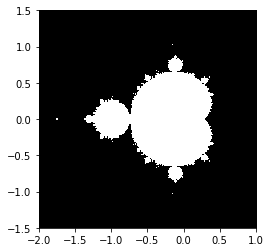

In [42]:
# Construct grid of values
npt = 200
x = np.linspace(-2, 1, npt)
y = np.linspace(-1.5, 1.5, npt)
Xs, Ys = np.meshgrid(x, y)

# Empty mask
Zs = np.zeros(Xs.shape, dtype=bool)

# Run iteration
niters = 100
C = 1000
for i in range(npt):
    for j in range(npt):
        c = complex(Xs[i,j], Ys[i,j])
        z = 0 + 0j
        try:
            for k in range(niters):
                z = z**2 + c
            Zs[i,j] = (abs(z) < C)
        except OverflowError:
            # Overflow means we have definitely diverged
            Zs[i,j] = False

# Plot
import matplotlib.pyplot as plt
plt.imshow(Zs, extent=[-2, 1, -1.5, 1.5], cmap='gray')
plt.show()